In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('quora_dataset.csv')
new_df = df.sample(30000 ,random_state=2)

In [3]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0
...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0


In [4]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q

In [5]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [6]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [7]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda x: len(x.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x: len(x.split(" ")))

In [8]:
def common_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [9]:
def total_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1.union(w2))

In [10]:
new_df['word_common'] = new_df.apply(common_words,axis=1)
new_df['word_total'] = new_df.apply(total_words ,axis =1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,2,13
185366,185512,366337,366338,what is the main reason behind 500 1k rs not...,why are 500 and 1k notes being banned in india,1,132,46,28,10,5,28
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,5,17
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,2,29
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,what is the best place to visit for summer,what is the best place to visit in summer,1,42,41,9,9,8,10
277646,277866,546311,546312,how can i get over this girl,how do i get over a girl i cannot be with,1,28,41,7,11,5,12
387331,387648,757859,757860,how do i become a graphics designer,should i become a graphic designer,0,35,34,7,6,4,9
279974,280197,550837,550838,how do i bake a cake in a microwave oven,how do you bake cakes in a convection oven,0,40,42,10,9,6,12


In [11]:
new_df['question2'][95166]

'what are the most attractive photos of michelle obama'

In [12]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [13]:
"I am here".split()

['I', 'am', 'here']

In [15]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    STOP_WORDS = stopwords.words('english')
    token_features = [0.0]*8
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    common_token_count= len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q2_tokens[0] == q2_tokens[0])
    
    return token_features
     

In [16]:
token_features = new_df.apply(fetch_token_features ,axis=1)

new_df['cwc_min'] = list(map(lambda x:x[0], token_features))
new_df['cwc_max'] = list(map(lambda x:x[1], token_features))
new_df['csc_min'] = list(map(lambda x:x[2], token_features))
new_df['csc_max'] = list(map(lambda x:x[3], token_features))
new_df['ctc_min'] = list(map(lambda x:x[4], token_features))
new_df['ctc_max'] = list(map(lambda x:x[5], token_features))
new_df['last_word_eq'] = list(map(lambda x:x[6], token_features))
new_df['first_word_eq'] = list(map(lambda x:x[7], token_features))

In [17]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,...,13,0.15,0.499988,0.499988,0.000000,0.000000,0.333328,0.222220,0.0,1.0
185366,185512,366337,366338,what is the main reason behind 500 1k rs not...,why are 500 and 1k notes being banned in india,1,132,46,28,10,...,28,0.18,0.799984,0.285712,0.199996,0.124998,0.499995,0.208332,1.0,1.0
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,...,17,0.29,0.333328,0.333328,0.749981,0.499992,0.499995,0.416663,1.0,1.0
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,...,29,0.07,0.166664,0.099999,0.249994,0.099999,0.199998,0.086956,0.0,1.0
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,...,20,0.25,0.399992,0.285710,0.599988,0.374995,0.499995,0.333331,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,what is the best place to visit for summer,what is the best place to visit in summer,1,42,41,9,9,...,10,0.80,0.999975,0.999975,0.799984,0.799984,0.888879,0.888879,1.0,1.0
277646,277866,546311,546312,how can i get over this girl,how do i get over a girl i cannot be with,1,28,41,7,11,...,12,0.42,0.999950,0.666644,0.599988,0.428565,0.714276,0.454541,0.0,1.0
387331,387648,757859,757860,how do i become a graphics designer,should i become a graphic designer,0,35,34,7,6,...,9,0.44,0.666644,0.666644,0.666644,0.499988,0.666656,0.571420,1.0,1.0
279974,280197,550837,550838,how do i bake a cake in a microwave oven,how do you bake cakes in a convection oven,0,40,42,10,9,...,12,0.50,0.499988,0.499988,0.799984,0.799984,0.666659,0.599994,1.0,1.0


In [18]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [19]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [20]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,...,0.499988,0.000000,0.000000,0.333328,0.222220,0.0,1.0,3.0,7.5,0.384615
185366,185512,366337,366338,what is the main reason behind 500 1k rs not...,why are 500 and 1k notes being banned in india,1,132,46,28,10,...,0.285712,0.199996,0.124998,0.499995,0.208332,1.0,1.0,14.0,17.0,0.234043
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,...,0.333328,0.749981,0.499992,0.499995,0.416663,1.0,1.0,2.0,11.0,0.216667
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,...,0.099999,0.249994,0.099999,0.199998,0.086956,0.0,1.0,13.0,16.5,0.145161
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,...,0.285710,0.599988,0.374995,0.499995,0.333331,0.0,1.0,5.0,12.5,0.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,what is the best place to visit for summer,what is the best place to visit in summer,1,42,41,9,9,...,0.999975,0.799984,0.799984,0.888879,0.888879,1.0,1.0,0.0,9.0,0.761905
277646,277866,546311,546312,how can i get over this girl,how do i get over a girl i cannot be with,1,28,41,7,11,...,0.666644,0.599988,0.428565,0.714276,0.454541,0.0,1.0,4.0,9.0,0.413793
387331,387648,757859,757860,how do i become a graphics designer,should i become a graphic designer,0,35,34,7,6,...,0.666644,0.666644,0.499988,0.666656,0.571420,1.0,1.0,1.0,6.5,0.542857
279974,280197,550837,550838,how do i bake a cake in a microwave oven,how do you bake cakes in a convection oven,0,40,42,10,9,...,0.499988,0.799984,0.799984,0.666659,0.599994,1.0,1.0,1.0,9.5,0.170732


In [21]:
#!pip install fuzzywuzzy

In [22]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [23]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [24]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,...,0.222220,0.0,1.0,3.0,7.5,0.384615,37,55,53,54
185366,185512,366337,366338,what is the main reason behind 500 1k rs not...,why are 500 and 1k notes being banned in india,1,132,46,28,10,...,0.208332,1.0,1.0,14.0,17.0,0.234043,43,67,44,63
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,...,0.416663,1.0,1.0,2.0,11.0,0.216667,71,71,73,78
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,...,0.086956,0.0,1.0,13.0,16.5,0.145161,36,43,34,35
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,...,0.333331,0.0,1.0,5.0,12.5,0.220000,66,63,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,what is the best place to visit for summer,what is the best place to visit in summer,1,42,41,9,9,...,0.888879,1.0,1.0,0.0,9.0,0.761905,94,93,94,96
277646,277866,546311,546312,how can i get over this girl,how do i get over a girl i cannot be with,1,28,41,7,11,...,0.454541,0.0,1.0,4.0,9.0,0.413793,61,75,75,81
387331,387648,757859,757860,how do i become a graphics designer,should i become a graphic designer,0,35,34,7,6,...,0.571420,1.0,1.0,1.0,6.5,0.542857,90,88,81,87
279974,280197,550837,550838,how do i bake a cake in a microwave oven,how do you bake cakes in a convection oven,0,40,42,10,9,...,0.599994,1.0,1.0,1.0,9.5,0.170732,78,75,63,78


In [25]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,...,0.222220,0.0,1.0,3.0,7.5,0.384615,37,55,53,54
185366,185512,366337,366338,what is the main reason behind 500 1k rs not...,why are 500 and 1k notes being banned in india,1,132,46,28,10,...,0.208332,1.0,1.0,14.0,17.0,0.234043,43,67,44,63
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,...,0.416663,1.0,1.0,2.0,11.0,0.216667,71,71,73,78
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,...,0.086956,0.0,1.0,13.0,16.5,0.145161,36,43,34,35
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,...,0.333331,0.0,1.0,5.0,12.5,0.220000,66,63,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,what is the best place to visit for summer,what is the best place to visit in summer,1,42,41,9,9,...,0.888879,1.0,1.0,0.0,9.0,0.761905,94,93,94,96
277646,277866,546311,546312,how can i get over this girl,how do i get over a girl i cannot be with,1,28,41,7,11,...,0.454541,0.0,1.0,4.0,9.0,0.413793,61,75,75,81
387331,387648,757859,757860,how do i become a graphics designer,should i become a graphic designer,0,35,34,7,6,...,0.571420,1.0,1.0,1.0,6.5,0.542857,90,88,81,87
279974,280197,550837,550838,how do i bake a cake in a microwave oven,how do you bake cakes in a convection oven,0,40,42,10,9,...,0.599994,1.0,1.0,1.0,9.5,0.170732,78,75,63,78


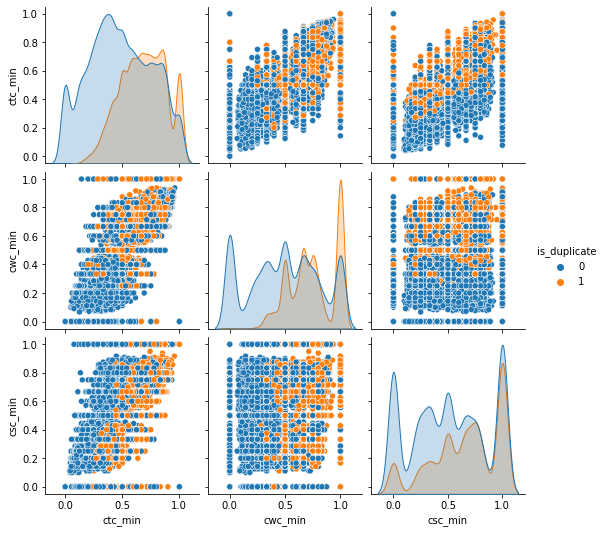

In [60]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']], hue='is_duplicate')

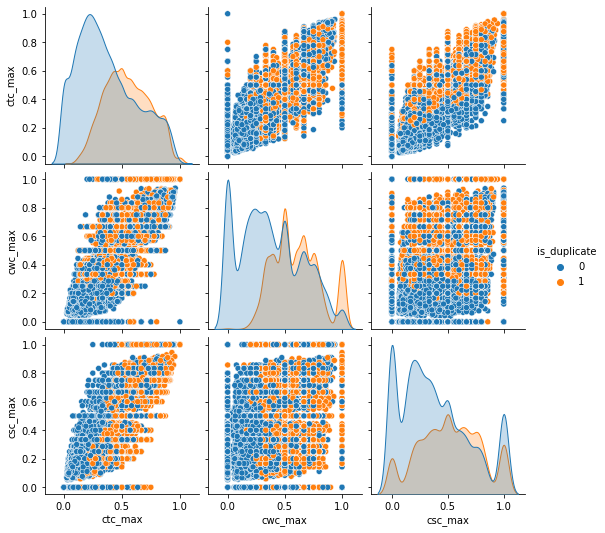

In [62]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']], hue='is_duplicate')

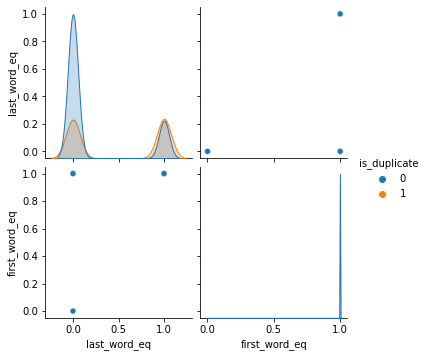

In [63]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']], hue='is_duplicate')

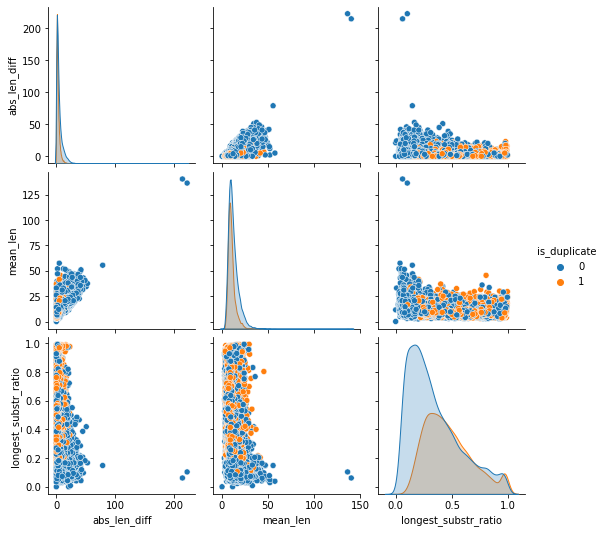

In [82]:
sns.pairplot(new_df[['abs_len_diff','mean_len','longest_substr_ratio','is_duplicate']], hue='is_duplicate')

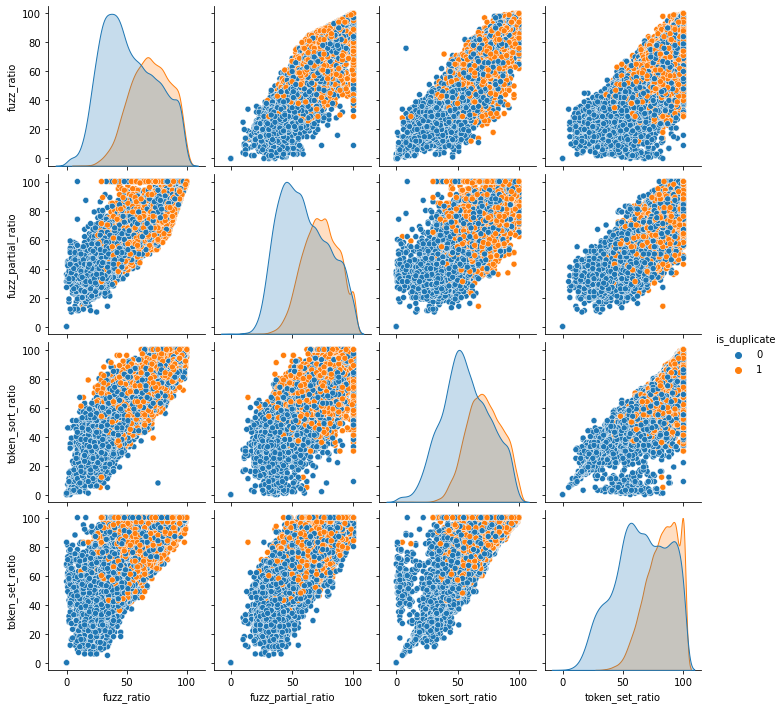

In [67]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']], hue='is_duplicate')

In [48]:
new_df.to_csv('30000_advanced_features_dataset.csv' , index =False)

In [47]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,...,0.222220,0.0,1.0,3.0,7.5,0.384615,37,55,53,54
185366,185512,366337,366338,what is the main reason behind 500 1k rs not...,why are 500 and 1k notes being banned in india,1,132,46,28,10,...,0.208332,1.0,1.0,14.0,17.0,0.234043,43,67,44,63
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,...,0.416663,1.0,1.0,2.0,11.0,0.216667,71,71,73,78
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,...,0.086956,0.0,1.0,13.0,16.5,0.145161,36,43,34,35
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,...,0.333331,0.0,1.0,5.0,12.5,0.220000,66,63,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,185158,365646,365647,what is the best place to visit for summer,what is the best place to visit in summer,1,42,41,9,9,...,0.888879,1.0,1.0,0.0,9.0,0.761905,94,93,94,96
277646,277866,546311,546312,how can i get over this girl,how do i get over a girl i cannot be with,1,28,41,7,11,...,0.454541,0.0,1.0,4.0,9.0,0.413793,61,75,75,81
387331,387648,757859,757860,how do i become a graphics designer,should i become a graphic designer,0,35,34,7,6,...,0.571420,1.0,1.0,1.0,6.5,0.542857,90,88,81,87
279974,280197,550837,550838,how do i bake a cake in a microwave oven,how do you bake cakes in a convection oven,0,40,42,10,9,...,0.599994,1.0,1.0,1.0,9.5,0.170732,78,75,63,78


In [26]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [87]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.551s...
[t-SNE] Computed neighbors for 30000 samples in 6.504s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

KeyboardInterrupt: 

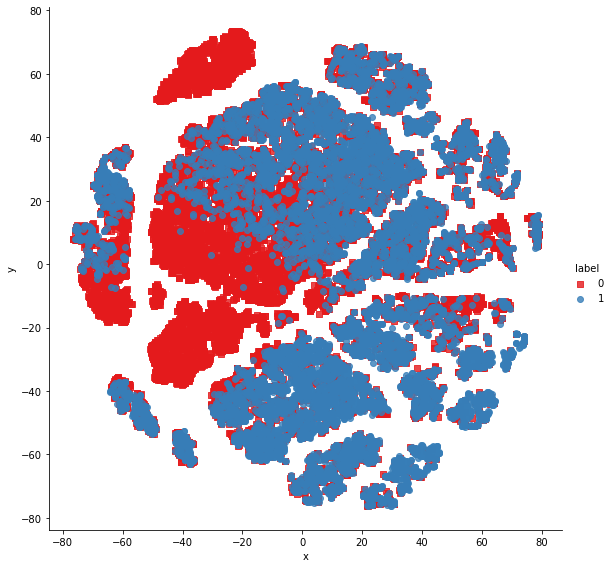

In [88]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [90]:
x_df

,x,y,label
0,-69.369240,9.791798,0
1,-21.692423,-55.371704,1
2,-1.656570,-24.899517,1
3,-45.483528,2.650656,0
4,-1.666503,4.988016,0
...,...,...,...
29995,43.428928,-58.049950,1
29996,21.695471,58.190918,1
29997,9.844232,-47.227142,0
29998,9.078442,-29.402309,0


In [94]:
tsne3d = TSNE(
    n_components=3,
    init='random', 
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.511s...
[t-SNE] Computed neighbors for 30000 samples in 6.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

KeyboardInterrupt: 

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [27]:
ques_df = new_df[['question1','question2']]
ques_df

,question1,question2
95166,is michelle obama a transgender person,what are the most attractive photos of michell...
185366,what is the main reason behind 500 1k rs not...,why are 500 and 1k notes being banned in india
178034,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...
366635,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...
215719,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score
...,...,...
185012,what is the best place to visit for summer,what is the best place to visit in summer
277646,how can i get over this girl,how do i get over a girl i cannot be with
387331,how do i become a graphics designer,should i become a graphic designer
279974,how do i bake a cake in a microwave oven,how do you bake cakes in a convection oven


In [28]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
95166,0,38,53,6,9,2,13,0.15,0.499988,0.499988,...,0.222220,0.0,1.0,3.0,7.5,0.384615,37,55,53,54
185366,1,132,46,28,10,5,28,0.18,0.799984,0.285712,...,0.208332,1.0,1.0,14.0,17.0,0.234043,43,67,44,63
178034,1,59,59,10,12,5,17,0.29,0.333328,0.333328,...,0.416663,1.0,1.0,2.0,11.0,0.216667,71,71,73,78
366635,0,120,61,25,10,2,29,0.07,0.166664,0.099999,...,0.086956,0.0,1.0,13.0,16.5,0.145161,36,43,34,35
215719,0,67,49,15,10,5,20,0.25,0.399992,0.285710,...,0.333331,0.0,1.0,5.0,12.5,0.220000,66,63,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,1,42,41,9,9,8,10,0.80,0.999975,0.999975,...,0.888879,1.0,1.0,0.0,9.0,0.761905,94,93,94,96
277646,1,28,41,7,11,5,12,0.42,0.999950,0.666644,...,0.454541,0.0,1.0,4.0,9.0,0.413793,61,75,75,81
387331,0,35,34,7,6,4,9,0.44,0.666644,0.666644,...,0.571420,1.0,1.0,1.0,6.5,0.542857,90,88,81,87
279974,0,40,42,10,9,6,12,0.50,0.499988,0.499988,...,0.599994,1.0,1.0,1.0,9.5,0.170732,78,75,63,78


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [30]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1 , temp_df2], axis = 1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
95166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279974,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
final_df = pd.concat([final_df, temp_df], axis=1)
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
95166,0,38,53,6,9,2,13,0.15,0.499988,0.499988,...,0,0,0,0,0,0,0,0,0,0
185366,1,132,46,28,10,5,28,0.18,0.799984,0.285712,...,0,0,0,0,0,0,0,0,0,0
178034,1,59,59,10,12,5,17,0.29,0.333328,0.333328,...,0,0,0,0,0,0,0,0,0,0
366635,0,120,61,25,10,2,29,0.07,0.166664,0.099999,...,0,0,0,0,0,0,0,0,0,0
215719,0,67,49,15,10,5,20,0.25,0.399992,0.285710,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,1,42,41,9,9,8,10,0.80,0.999975,0.999975,...,0,0,0,0,0,0,0,0,0,0
277646,1,28,41,7,11,5,12,0.42,0.999950,0.666644,...,0,0,0,0,0,0,0,0,0,0
387331,0,35,34,7,6,4,9,0.44,0.666644,0.666644,...,0,0,0,0,0,0,0,0,0,0
279974,0,40,42,10,9,6,12,0.50,0.499988,0.499988,...,0,0,1,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7808333333333334

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.789

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[3190,  580],
       [ 735, 1495]], dtype=int64)

In [37]:
confusion_matrix(y_test,y_pred1)

array([[3146,  624],
       [ 642, 1588]], dtype=int64)

In [43]:
def query_point_predicter(q1,q2):
    input_query = []
    
    q1= preprocess(q1)
    q2 = preprocess(q2)
    
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(common_word_test(q1,q2))
    input_query.append(total_word_test(q1,q2))
    input_query.append(round(common_word_test(q1,q2)/total_word_test(q1,q2),2))
    
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    q1_bow = cv.transform([q1]).toarray()
    q2_bow = cv.transform([q2]).toarray()
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [44]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'

In [45]:
rf.predict(query_point_predicter(q1,q2))

array([0], dtype=int64)

In [38]:
def common_word_test(q1,q2):
    w1 = set(map(lambda word:word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word:word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [39]:
def total_word_test(q1,q2):
    w1 = set(map(lambda word:word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word:word.lower().strip(), q2.split(" ")))
    return len(w1.union(w2))

In [40]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [41]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) >0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [42]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [46]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))